In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/Replication'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
filenames = glob.glob('Nline_*.mat')
#print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
#data_dict.keys()

In [8]:
sub_ex = data_dict.keys()[-1]

In [9]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [10]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][1][13][2][0][0]
#len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

0

In [11]:
#data_dict[sub_ex]['p'].dtype.names

In [12]:
#Comment this out for include all subjects
#del data_dict['s_']

In [13]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [14]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [15]:
#new_dat[sub_ex]['NlineResults']['Run_1'].keys()

In [16]:
new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

[array([3], dtype=uint8),
 array([11], dtype=uint8),
 array([77], dtype=uint8),
 array([45], dtype=uint8),
 array([28], dtype=uint8),
 array([74], dtype=uint8),
 array([85], dtype=uint8),
 array([21], dtype=uint8),
 array([60], dtype=uint8),
 array([7], dtype=uint8),
 array([98], dtype=uint8),
 array([36], dtype=uint8),
 array([65], dtype=uint8),
 array([33], dtype=uint8),
 array([57], dtype=uint8),
 array([90], dtype=uint8),
 u'ox',
 u'or',
 u'as',
 u'my',
 u'it',
 u'he',
 u'of',
 u'be',
 u'is',
 u'by',
 u'we',
 u'do',
 u'am',
 u'so',
 u'if',
 u'me',
 array([20], dtype=uint8),
 array([-94], dtype=int16),
 array([-86], dtype=int16),
 array([70], dtype=uint8),
 array([-58], dtype=int16),
 array([80], dtype=uint8),
 array([-34], dtype=int16),
 array([-28], dtype=int16),
 array([-78], dtype=int16),
 array([14], dtype=uint8),
 array([48], dtype=uint8),
 array([54], dtype=uint8),
 array([-10], dtype=int16),
 array([96], dtype=uint8),
 array([30], dtype=uint8),
 array([-44], dtype=int16)]

In [17]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [18]:
#new_dat[sub_ex]['NlineResults']['Run_1']['MouseTrack']

In [19]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [20]:
#indexes[90]

In [21]:
#indexes[1][1]

In [22]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()

In [23]:
#len(indexes)

In [24]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe', 'MouseTrack', 'Probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        elif var == probes[1]:
            if new_dat.get(data[0]).get(Nline).get(data[1]).get(var,0) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1])[var] = []
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)) <= data[2]:
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        elif var == probes[2]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 1:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 2:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        else:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
    Dic_list.append(temp_dict)

In [25]:
#Dic_list[10]

In [26]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
#sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

In [27]:
#nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

In [28]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
#nline_df.index.names

In [29]:
#plt.plot(nline_df.loc['s_04102','Run_2',0]['MouseTrack'])

### Create Stim Labels

Data Column Names

In [30]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'MouseTrack', u'Move', u'Points',
       u'Probe', u'RT', u'RTHold', u'Response', u'Slow', u'Task', u'TestX',
       u'Trial', u'Wrong', u'catch', u'catch_probe', u'consider_onset',
       u'consider_onset_real', u'decision_end', u'decision_end_real',
       u'decision_onset', u'decision_onset_real', u'hold', u'hold_onset',
       u'hold_onset_real', u'iti', u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [31]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct', 'Response']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
#len(nline_no_miss)

In [32]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [33]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
#nline_missed

In [34]:
nline_missed = nline_no_miss.loc[nline_no_miss['Missed']==1,:]
position_missed = nline_no_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [35]:
#nline_no_miss['Missed']

In [38]:
responded = nline_no_miss.loc[nline_no_miss['Missed']==0,:]
responded['AbsError'] = np.abs(responded['Error'])
#nline_no_miss

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## How many trials missed?

In [41]:
nline_missed['Missed'].groupby(level=0).sum()


Subject
s_04101     4
s_04102    10
s_04103    11
s_04104    37
s_04105    15
s_04106    20
s_04107    15
s_04108     1
s_04109     4
s_04110     8
s_04111     2
s_04112     8
s_04113    15
s_04114     3
s_04116    67
s_04117    37
s_04118     6
s_04119     1
s_04201     2
s_04202     3
s_04203     9
s_04204     4
s_04205     4
s_04206     3
s_04207     8
s_04208    19
s_04209     3
s_04210     5
s_04211     2
s_04212     3
s_04213     9
s_04214    18
s_04215    14
s_04216     2
s_04217     2
s_04218     3
s_04219     7
s_04220     5
Name: Missed, dtype: float64

In [42]:
missed = nline_missed['Missed'].groupby(level=0).sum()

In [45]:
##Subject Standard Deviations (title for markdown deleted)
#nline_no_miss_subj.std()

In [46]:
##Overall Standard Deviation (deleted from markdown)
#np.mean(nline_no_miss_subj.std())

##How many trials did they actually respond?

Subject s_04102 only answered 6 trials of 4th run

S_04116 seems to have not understood the word task

In [47]:
responded['RT'].groupby(level=0).count()

Subject
s_04101    140
s_04102    102
s_04103    133
s_04104    107
s_04105    129
s_04106    124
s_04107    129
s_04108    143
s_04109    140
s_04110    136
s_04111    142
s_04112    136
s_04113    129
s_04114    141
s_04115    144
s_04116     77
s_04117    107
s_04118    138
s_04119    143
s_04201    142
s_04202    141
s_04203    135
s_04204    140
s_04205    140
s_04206    141
s_04207    136
s_04208    125
s_04209    141
s_04210    139
s_04211    142
s_04212    141
s_04213    135
s_04214    126
s_04215    130
s_04216    142
s_04217    142
s_04218    141
s_04219    137
s_04220    139
dtype: int64

# RT Histograms

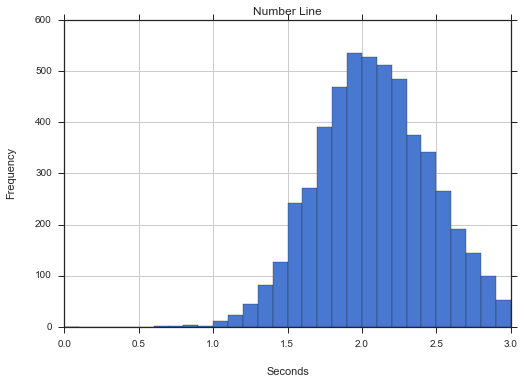

In [48]:
#pd.options.display.mpl_style = 'default'
responded['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,600])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## Missed by position (across subjects)

In [49]:
position_missed.sum()

Task  Line_pct
1     0.03         8
      0.07        11
      0.11         7
      0.21         9
      0.28         8
      0.33        10
      0.36        10
      0.45         6
      0.57         6
      0.60         4
      0.65         5
      0.74         8
      0.77        12
      0.85         8
      0.90         8
      0.98         8
2     0.03         8
      0.07         5
      0.11         6
      0.21        13
      0.28         8
      0.33         3
      0.36         5
      0.45         4
      0.57         3
      0.60         3
      0.65         5
      0.74         8
      0.77         9
      0.85        14
      0.90         7
      0.98         7
3     0.03         9
      0.07        15
      0.11        11
      0.21         7
      0.28         8
      0.33         7
      0.36         8
      0.45         7
      0.57         7
      0.60         9
      0.65         9
      0.74        12
      0.77         8
      0.85         8
      0.90        1

In [50]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
#len(pos_miss_1)

The following code gives me a list for the palette and I can iterate through it for the colors I need

In [51]:
pal = sns.color_palette()

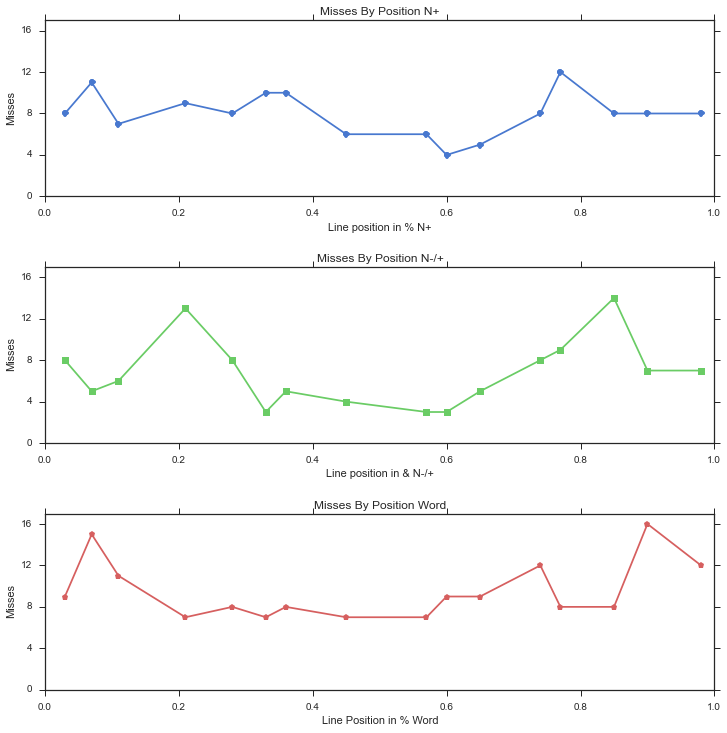

In [52]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, 'o-', color=pal[0])
plt.title('Misses By Position N+')
plt.xlabel('Line position in % N+', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, color=pal[1], marker='s')
plt.title('Misses By Position N-/+')
plt.xlabel('Line position in & N-/+', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, color=pal[2], marker='p')
plt.title('Misses By Position Word')
plt.xlabel('Line Position in % Word', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

plt.subplots_adjust(hspace=.4)

## RTHold missed analysis

##RTHold Subject Average

In [53]:
nline_missed['RTHold'].groupby(level=0).mean()

Subject
s_04101    0.760889
s_04102    1.330117
s_04103    0.575732
s_04104    0.463784
s_04105    0.623258
s_04106    0.736115
s_04107    0.550096
s_04108    0.369036
s_04109    1.114158
s_04110    0.602176
s_04111    0.688119
s_04112    0.403312
s_04113    0.728374
s_04114    0.600681
s_04116    2.077192
s_04117    0.757407
s_04118    0.704647
s_04119    0.773352
s_04201    1.150705
s_04202    0.518021
s_04203    0.556139
s_04204    1.089988
s_04205    0.591679
s_04206    0.398903
s_04207    0.362602
s_04208    0.373545
s_04209    0.394067
s_04210    0.461892
s_04211    0.482860
s_04212    1.264613
s_04213    1.199714
s_04214    0.625229
s_04215    0.734159
s_04216    0.548096
s_04217    0.435670
s_04218    1.193555
s_04219    0.977487
s_04220    1.012856
Name: RTHold, dtype: float64

##RTHold Overall Average

In [54]:
np.mean(nline_missed['RTHold'].groupby(level=0).mean())

0.7429005850357813

In [57]:
responded.loc[:,'RT_Diff'] = responded['RT']-responded['RTHold']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


##Averages by subjected for responded trials

In [58]:
responded[['Error', 'RT', 'RTHold', 'RT_Diff', 'AbsError']].groupby(level=0).mean()

,Error,RT,RTHold,RT_Diff,AbsError
Subject,,,,,
s_04101,0.000367,2.126994,0.438679,1.688315,0.014450
s_04102,-0.001154,2.086361,0.562893,1.523468,0.029723
s_04103,-0.005674,2.213000,0.419749,1.793251,0.014655
s_04104,0.001768,2.136014,0.495792,1.640222,0.020394
s_04105,-0.004287,2.187713,0.453583,1.734130,0.018730
s_04106,-0.005307,2.278004,0.464659,1.813344,0.021909
s_04107,0.001220,2.255703,0.419663,1.836041,0.019135
s_04108,-0.005221,1.916144,0.392673,1.523472,0.018594
s_04109,-0.009659,1.953166,0.394496,1.558670,0.029116


##Overall Averages

In [59]:
np.mean(responded[['Error', 'RT', 'RTHold','RT_Diff','AbsError']].groupby(level=0).mean())

Error       0.004190
RT          2.090186
RTHold      0.452226
RT_Diff     1.637960
AbsError    0.028521
dtype: float64

## Plots by position

In [ ]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [ ]:
n_subj = len(responded_subj)

In [ ]:
#responded.iloc[0:20]

##RTs by position averages (across subjects)

In [ ]:
position_tasks['RT'].mean()

In [ ]:
rts = position_tasks['RT'].mean()
rts_std = position_tasks['RT'].std()
rts_se = rts_std/np.sqrt(n_subj)

Next code is to calculate standard error by first computing the mean RT for each subject and then taking the std of the subjects

In [ ]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['RT'].mean())

In [ ]:
for task in D:
    #print task
    for stim in D[task]:
        D[task][stim] = np.nanstd(D[task][stim])

In [ ]:
rts_std_1 = []
rts_std_2 = []
rts_std_3 = []
for stim in D[1]:
    rts_std_1.append(D[1][stim])
for stim in D[2]:
    rts_std_2.append(D[2][stim])
for stim in D[3]:
    rts_std_3.append(D[3][stim])

In [ ]:
rts_se_1 = rts_std_1/np.sqrt(n_subj)
rts_se_2 = rts_std_2/np.sqrt(n_subj)
rts_se_3 = rts_std_3/np.sqrt(n_subj)

In [ ]:
#rts.iloc[10]

In [ ]:
rts_1 = rts.iloc[0:16]
rts_2 = rts.iloc[16:32]
rts_3 = rts.iloc[32:48]
#rts_1 = rts.iloc[0:14]
#rts_2 = rts.iloc[14:30]
#rts_3 = rts.iloc[30:46]

In [ ]:
error = position_tasks['AbsError'].mean()
error_std = position_tasks['AbsError'].std()
error_se = error_std/np.sqrt(n_subj)

In [ ]:
error_1 = error.iloc[0:16]
error_2 = error.iloc[16:32]
error_3 = error.iloc[32:48]
#error_1 = error.iloc[0:14]
#error_2 = error.iloc[14:30]
#error_3 = error.iloc[30:46]

In [ ]:
rts_1 = rts_1.get_values()
rts_2 = rts_2.get_values()
rts_3 = rts_3.get_values()

In [ ]:
error_1 = error_1.get_values()
error_2 = error_2.get_values()
error_3 = error_3.get_values()

In [ ]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

In [ ]:
#len(rts_3)

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'o-', color=pal[0])
fig1.errorbar(xvals, rts_1, yerr=rts_se_1*1.96)
plt.title('Mean RT By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, color=pal[1], marker='s')
fig2.errorbar(xvals, rts_2, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, color=pal[2], marker='p')
fig3.errorbar(xvals, rts_3, yerr=rts_se_3*1.96, color=pal[2])
plt.title('Mean RT By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

In [ ]:
rts_1corr = rts_1 - rts_3
rts_2corr = rts_2 - rts_3
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(2,1,1)
fig1.plot(xvals, rts_1corr, 'o-', color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
fig1.errorbar(xvals, rts_1corr, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.3,0.3])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig2 = plt.subplot(2,1,2)
fig2.plot(xvals, rts_2corr, color=pal[1], marker='s')
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_2corr, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.3,0.3])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

## PAE by position (averages across subjects)

next code is doing the average for each subject first and then taking the standard deviation

In [ ]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['AbsError'].mean())

In [ ]:
for task in D:
    #print task
    for stim in D[task]:
        D[task][stim] = np.nanstd(D[task][stim])

In [ ]:
error_std_1 = []
error_std_2 = []
error_std_3 = []
for stim in D[1]:
    error_std_1.append(D[1][stim])
for stim in D[2]:
    error_std_2.append(D[2][stim])
for stim in D[3]:
    error_std_3.append(D[3][stim])

In [ ]:
error_se_1 = error_std_1/np.sqrt(n_subj)
error_se_2 = error_std_2/np.sqrt(n_subj)
error_se_3 = error_std_3/np.sqrt(n_subj)

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1, yerr=error_se_1*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2, yerr=error_se_2*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3, yerr=error_se_3*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

plt.subplots_adjust(hspace=.4)

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1, yerr=error_se[0:16]*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, color=pal[1], marker='s')
fig2.errorbar(xvals, error_2, yerr=error_se[16:32]*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3, yerr=error_se[32:]*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

plt.subplots_adjust(hspace=.4)

###Signed error is calculated as Response - Correct

In [ ]:
signerror = position_tasks['Error'].mean()
STDsignerror = position_tasks['Error'].std()
signerror_1 = signerror.iloc[0:16]
signerror_2 = signerror.iloc[16:32]
signerror_3 = signerror.iloc[32:48]
STDsignerror_1 = STDsignerror.iloc[0:16]
STDsignerror_2 = STDsignerror.iloc[16:32]
STDsignerror_3 = STDsignerror.iloc[32:48]
signerror_1 = signerror_1.get_values()
signerror_2 = signerror_2.get_values()
signerror_3 = signerror_3.get_values()
STDsignerror_1 = STDsignerror_1.get_values()
STDsignerror_2 = STDsignerror_2.get_values()
STDsignerror_3 = STDsignerror_3.get_values()
SEsignerror_1 = STDsignerror_1/np.sqrt(n_subj)
SEsignerror_2 = STDsignerror_2/np.sqrt(n_subj)
SEsignerror_3 = STDsignerror_3/np.sqrt(n_subj)

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1, yerr=SEsignerror_1*1.96, color=pal[0])
plt.title('Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, color=pal[1], marker='s')
fig2.errorbar(xvals, signerror_2, yerr=SEsignerror_2*1.96, color=pal[1])
plt.title('Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3, yerr=SEsignerror_3*1.96, color=pal[2])
plt.title('Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

 Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

Signed error plot with standard error calculated by first taking the mean of 3 estimates per subject and then taking std across different subjects

In [ ]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())

In [ ]:
for task in D:
    #print task
    for stim in D[task]:
        D[task][stim] = np.nanmean(D[task][stim])

In [ ]:
SDsignerror_1 = []
SDsignerror_2 = []
SDsignerror_3 = []
for stim in D[1]:
    SDsignerror_1.append(D[1][stim])
for stim in D[2]:
    SDsignerror_2.append(D[2][stim])
for stim in D[3]:
    SDsignerror_3.append(D[3][stim])

In [ ]:
SE_signerror_1 = SDsignerror_1/np.sqrt(n_subj)
SE_signerror_2 = SDsignerror_2/np.sqrt(n_subj)
SE_signerror_3 = SDsignerror_3/np.sqrt(n_subj)

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1, yerr=SE_signerror_1*1.96, color=pal[0])
plt.title('Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, color=pal[1], marker='s')
fig2.errorbar(xvals, signerror_2, yerr=SE_signerror_2*1.96, color=pal[1])
plt.title('Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3, yerr=SE_signerror_3*1.96, color=pal[2])
plt.title('Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

## SD calculated as SD of all data of a specific position

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'o-', color=pal[0])
plt.title('SD Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.2])
plt.yticks(([0.033,0.066,0.1,0.133,0.166,0.2]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, color=pal[1], marker='s')
plt.title('SD Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.2])
plt.yticks(([0.033,0.066,0.1,0.133,0.166,0.2]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.2])
plt.yticks(([0.033,0.066,0.1,0.133,0.166,0.2]))

plt.subplots_adjust(hspace=.4)

In [ ]:
#Basis to extract SD for each subject and then conduct average across subjects
#position_tasks.get_group((1,0.03)).loc['s_02009']['Error'].std()

## SD calculated as std of each subject and then averaging the individual std

###Only 3 datapoints per position per subject so estimate will have a lot of varriability

In [ ]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

In [ ]:
for task in D:
    #print task
    for stim in D[task]:
        D[task][stim] = np.nanmean(D[task][stim])

In [ ]:
STDsignerror_1_2 = []
STDsignerror_2_2 = []
STDsignerror_3_2 = []
for stim in D[1]:
    STDsignerror_1_2.append(D[1][stim])
for stim in D[2]:
    STDsignerror_2_2.append(D[2][stim])
for stim in D[3]:
    STDsignerror_3_2.append(D[3][stim])

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'o-', color=pal[0])
plt.title('SD Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, color=pal[1], marker='s')
plt.title('SD Signed Error By Position N+/-')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

plt.subplots_adjust(hspace=.4)

In [ ]:
#For mean error as well can be calculated this way
D2 = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D2.get(task,0) == 0:
            D2[task] = {}
        if D2[task].get(stim,0) == 0:
            D2[task][stim] = []
        D2[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())

##Correlate PAE Vs Landmark Distance

### Distance from 0

In [ ]:
dist_0 = xvals
dist_0

### Distance from 50

In [ ]:
dist_50 = abs(xvals-0.5)
dist_50

### Distance from 100

In [ ]:
dist_100 = abs(xvals - 1)
dist_100

### Distance from Landmark

In [ ]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

## PAE vs Landmark Distane (across subjects)

In [ ]:
m1, b1 = np.polyfit(dist_Land,error_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

### Slope+,  Slope-,  Slopew

In [ ]:
print m1, m2, m3

In [ ]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3)

### r +,  r -,  r w

In [ ]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

### r^2 +,  r^2 -,  r^2 w

In [ ]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

In [ ]:
#print 'slope1', slope1
#print 'slope2', slope2
#print 'slope3', slope3

In [ ]:
print 'p1', p1
print 'p2', p2
print 'p3', p3

##First half only

In [ ]:
m1, b1 = np.polyfit(dist_Land[0:7],error_1[0:7],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[0:7], error_1[0:7], 'o', color=pal[0])
plt.plot(dist_Land[0:7], m1*dist_Land[0:7] + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[0:7],error_2[0:7],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[0:7], error_2[0:7], 'o', color=pal[1])
plt.plot(dist_Land[0:7], m2*dist_Land[0:7] + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[0:7],error_3[0:7],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[0:7], error_3[0:7], 'o', color=pal[2])
plt.plot(dist_Land[0:7], m3*dist_Land[0:7] + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

##Second half only

In [ ]:
m1, b1 = np.polyfit(dist_Land[8:],error_1[8:],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[8:], error_1[8:], 'o', color=pal[0])
plt.plot(dist_Land[8:], m1*dist_Land[8:] + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[8:],error_2[8:],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[8:], error_2[8:], 'o', color=pal[1])
plt.plot(dist_Land[8:], m2*dist_Land[8:] + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[8:],error_3[8:],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[8:], error_3[8:], 'o', color=pal[2])
plt.plot(dist_Land[8:], m3*dist_Land[8:] + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

## Landmark distance Vs signed error

In [ ]:
m1, b1 = np.polyfit(dist_Land,signerror_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, signerror_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('Signed Error Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m2, b2 = np.polyfit(dist_Land,signerror_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, signerror_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('Signed Error Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m3, b3 = np.polyfit(dist_Land,signerror_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, signerror_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('Signed Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

plt.subplots_adjust(hspace=.4)

## Estimation slope vs SAT scores

In [ ]:
nline_df.to_csv('nline_data.csv', sep='\t')

In [ ]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [ ]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [ ]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [ ]:
new_df['AbsError'] = np.abs(new_df['Error'])

In [ ]:
new_df['BigError'] = 0
new_df['BigError'].loc[new_df['AbsError']>0.15] = 1
new_df['BigError'].sum()

In [ ]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [ ]:
#group_task.groups

In [ ]:
#group_task.get_group(('s_02003',1,0.98))['Error'].mean()

In [ ]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [ ]:
#error.loc['s_02003'].loc[1]

In [ ]:
#response.loc['s_02003'].loc[1]

In [ ]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()


In [ ]:
error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

In [ ]:
slope1, intercept1, r1, p1, stderr1 = linregress(position_dict['s_02003'][3].index,
                                                 position_dict['s_02003'][3])

In [ ]:
#plt.plot(position_dict['s_02003'][3].index, position_dict['s_02003'][3], 'bo')
#plt.plot(position_dict['s_02003'][3].index, slope1*position_dict['s_02003'][3].index + intercept1, '-o')
#plt.ylim([0,1])

In [ ]:
#print slope1, intercept1, r1, r1*r1, p1, stderr1

In [ ]:
#res_df

In [ ]:
res_grp = res_df.groupby(['Subject','Task'])

In [ ]:
#res_df['slope_P'][res_df['Task']==1].mean()

In [ ]:
#res_df[['Subject','slope_P']][res_df['Task']==1]

In [ ]:
#plt.plot(res_df['slope_P'][res_df['Task']==1], 'o')

In [ ]:
#res_df['slope_P'][res_df['Task']==1].describe()

## Histogram slope subject estimates Task +

In [ ]:
res_df['slope_P'][res_df['Task']==1].hist()

## Histogram slope subject estimates Task -

In [ ]:
res_df['slope_P'][res_df['Task']==2].hist(color=pal[1])

## Histogram slope subject estimates Task w

In [ ]:
res_df['slope_P'][res_df['Task']==2].hist(color=pal[2])

In [ ]:
math = pd.read_csv('Math_Results.csv')

In [ ]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

In [ ]:
#res_df[['Subject','slope_P', 'Math_Score']][res_df['Task']==1]

In [ ]:
#slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_E'][res_df['Task']==1]),
#                                                 res_df['Math_Score'][res_df['Task']==1])
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]),res_df['Math_Score'][res_df['Task']==1], 'o')
#plt.plot(abs(res_df['slope_E'][res_df['Task']==1]), slope1*abs(res_df['slope_E'][res_df['Task']==1]) + intercept1, 'b-')

In [ ]:
#print r1, r1*r1, p

##  Deviation from Linearity Vs. Math Score

In [ ]:
m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, '-', color=pal[0])
plt.title('Deviation from Slope of 1 Vs. Math Score N+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, '-', color=pal[1])
plt.title('Deviation from Slope of 1 Vs. Math Score N-/+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3] -1),
                    res_df['Math_Score'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, '-', color=pal[2])
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [ ]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

### r +, r -, r w

In [ ]:
print r1, r2, r3

### R^2 +, R^2 -, R^2 w

In [ ]:
print r1*r1, r2*r2, r3*r3

### Slope +, Slope -, Slope w

In [ ]:
print slope1, slope2, slope3

### p-value +, p-value -, p-value w

In [ ]:
print p1, p2, p3

##Scatter plots for individual subjects

In [ ]:
new_math_df = pd.merge(new_df,math,on='Subject',how='inner')

In [ ]:
ordered = res_df[['Subject', 'Math_Score']][res_df['Task']==1]
ordered_math = ordered.sort('Math_Score', ascending=False)

In [ ]:
table_order = ordered_math.Subject

In [ ]:
#sns.set_palette('muted')
#sns.set_style('ticks')
#g = sns.FacetGrid(new_math_df[new_math_df['Task']==1], col='Subject', col_wrap=3, xlim=(0,1),
#                  ylim=(0,1), col_order=ordered_math['Subject'], size=4, aspect=1.2)
#g = g.map(sns.regplot, 'Line_pct', 'Response', scatter_kws={'s':80, 'marker':'+'})
#ctr = 0
#for ax in g.axes.flat:
#    ax.set_title(ordered_math.iloc[ctr]['Math_Score'])
#    ctr = ctr + 1

# Task N+

# How to add a figure title to the whole figure?
# How to format the small titles with smart code that has the subj id plus the SAT score, and some constant string from me

In [ ]:
#sns.set_palette('BuGn_r')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200, 'color':pal[0]},
              line_kws={'color':pal[0]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Positive.png')

# Task N-/+

In [ ]:
#sns.set_palette('muted')
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'color':pal[1]},
              line_kws={'color':pal[1]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Negative.png')

## Make Result Table

In [ ]:
group_task_t = new_df.groupby(['Subject', 'Task'])
#group_task_t['BigError'].sum()

In [ ]:
results_df = pd.DataFrame(new_df[new_df['Task']==1].groupby('Subject')['RT'].mean())
results_df.columns = ['RT+']
results_df['RT-'] = new_df[new_df['Task']==2].groupby('Subject')['RT'].mean()
results_df['RTw'] = new_df[new_df['Task']==3].groupby('Subject')['RT'].mean()

In [ ]:
results_df['E+'] = new_df[new_df['Task']==1].groupby('Subject')['BigError'].sum()
results_df['E-'] = new_df[new_df['Task']==2].groupby('Subject')['BigError'].sum()
results_df['Ew'] = new_df[new_df['Task']==3].groupby('Subject')['BigError'].sum()

In [ ]:
sds = []
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        sds.append({'Subject':sub, 'Task':task, 'Line_pct':stim,
             'SD':position_tasks.get_group((task,stim)).loc[sub]['Error'].std()})
SD_df = pd.DataFrame(sds)
results_df['SD+'] = SD_df[SD_df['Task']==1].groupby('Subject')['SD'].mean()
results_df['SD-'] = SD_df[SD_df['Task']==2].groupby('Subject')['SD'].mean()
results_df['SDw'] = SD_df[SD_df['Task']==3].groupby('Subject')['SD'].mean()

In [ ]:
r2_1 = res_df[['Subject','R2_P']][res_df['Task']==1]
r2_1.columns = ['Subject', 'R^2+']
results_df = results_df.join(r2_1.groupby('Subject').mean(), how='inner')

In [ ]:
r2_2 = res_df[['Subject','R2_P']][res_df['Task']==2]
r2_2.columns = ['Subject', 'R^2-']
results_df = results_df.join(r2_2.groupby('Subject').mean(), how='inner')

In [ ]:
r2_3 = res_df[['Subject','R2_P']][res_df['Task']==3]
r2_3.columns = ['Subject', 'R^2w']
results_df = results_df.join(r2_3.groupby('Subject').mean(), how='inner')

In [ ]:
slope_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
slope_1.columns = ['Subject', 'slope+']
results_df = results_df.join(slope_1.groupby('Subject').mean(), how='inner')
slope_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
slope_2.columns = ['Subject', 'slope-']
results_df = results_df.join(slope_2.groupby('Subject').mean(), how='inner')
slope_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
slope_3.columns = ['Subject', 'slopew']
results_df = results_df.join(slope_3.groupby('Subject').mean(), how='inner')

In [ ]:
PAE1 = new_df[new_df['Task']==1].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE2 = new_df[new_df['Task']==2].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE3 = new_df[new_df['Task']==3].groupby(['Subject', 'Line_pct'])['AbsError'].mean()

In [ ]:
#PAE1.loc['s_02003'].iloc[0:8]

In [ ]:
corrs1 = []
for sub in PAE1.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE1.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE1.loc[sub].iloc[8:])
    corrs1.append({'Subject':sub, 'DE_l_+':r1, 'DE_r_+':r2})
DE1 = pd.DataFrame(corrs1)
results_df = results_df.join(DE1.groupby('Subject').mean(), how='inner')

In [ ]:
corrs2 = []
for sub in PAE2.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE2.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE2.loc[sub].iloc[8:])
    corrs2.append({'Subject':sub, 'DE_l_-':r1, 'DE_r_-':r2})
DE2 = pd.DataFrame(corrs2)
results_df = results_df.join(DE2.groupby('Subject').mean(), how='inner')

In [ ]:
corrs3 = []
for sub in PAE3.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land[0:8],PAE3.loc[sub].iloc[0:8])
    slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land[8:],PAE3.loc[sub].iloc[8:])
    corrs3.append({'Subject':sub, 'DE_l_w':r1, 'DE_r_w':r2})
DE3 = pd.DataFrame(corrs3)
results_df = results_df.join(DE3.groupby('Subject').mean(), how='inner')

In [ ]:
miss_df = pd.read_csv('nline_data.csv',sep='\t')
miss_df.loc[:,:]= miss_df[miss_df['catch']<1]
#len(nline_miss)
miss_df['Missed'] = miss_df['Error']
miss_df.loc[miss_df['Missed']<1,'Missed'] = 0
miss_df = miss_df[pd.notnull(miss_df['Subject'])]

In [ ]:
results_df['Miss+'] = miss_df[miss_df['Task']==1].groupby('Subject')['Missed'].sum()
results_df['Miss-'] = miss_df[miss_df['Task']==2].groupby('Subject')['Missed'].sum()
results_df['Missw'] =miss3 = miss_df[miss_df['Task']==3].groupby('Subject')['Missed'].sum()

In [ ]:
math.columns = ['Subject', 'SAT']
results_df = results_df.join(math.groupby('Subject').mean(), how='inner')

In [ ]:
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[-4:-1] + cols[0:-4]
results_df = results_df[cols]

In [ ]:
results_df['AbsError+'] = new_df[new_df['Task']==1].groupby('Subject')['AbsError'].mean()
results_df['AbsError-'] = new_df[new_df['Task']==2].groupby('Subject')['AbsError'].mean()
results_df['AbsErrorw'] = new_df[new_df['Task']==3].groupby('Subject')['AbsError'].mean()

In [ ]:
linear_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
linear_1.loc[:,'slope_P'] = abs(linear_1['slope_P'] - 1)
linear_1.columns = ['Subject', 'linearity+']
results_df = results_df.join(linear_1.groupby('Subject').mean(), how='inner')
linear_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
linear_2.loc[:,'slope_P'] = abs(linear_2['slope_P'] - 1)
linear_2.columns = ['Subject', 'linearity-']
results_df = results_df.join(linear_2.groupby('Subject').mean(), how='inner')
linear_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
linear_3.loc[:,'slope_P'] = abs(linear_3['slope_P'] - 1)
linear_3.columns = ['Subject', 'linearityw']
results_df = results_df.join(linear_3.groupby('Subject').mean(), how='inner')

In [ ]:
results_df = results_df.loc[table_order]
results_df

In [ ]:
results_df.to_excel('Results Table.xlsx', index_label='Subject', merge_cells=False)

##  PAE Vs. Math Score

In [ ]:
m1, b1 = np.polyfit(results_df['AbsError+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['AbsError+'], 
         m1*results_df['AbsError+'] + b1, '-', color=pal[0])
plt.title('PAE Vs. Math Score N+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(results_df['AbsError-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['AbsError-'], 
         m2*results_df['AbsError-'] + b2, '-', color=pal[1])
plt.title('PAE Vs. Math Score N-/+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(results_df['AbsErrorw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsErrorw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['AbsErrorw'], 
         m3*results_df['AbsErrorw'] + b3, '-', color=pal[2])
plt.title('PAE Vs. Math Score Word')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [ ]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['AbsError+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['AbsError-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['AbsErrorw'],results_df['SAT'])

### Slope +, Slope -, Slope w

In [ ]:
print slope1, slope2, slope3

### r =, r -, r w

In [ ]:
print r1, r2, r3

### R^2 +, R^2 -, R^2 w

In [ ]:
print r1*r1, r2*r2, r3*r3

### p-value +, p-value -, p-value w

In [ ]:
print p1, p2, p3

In [ ]:
np.corrcoef(results_df['slope-'], results_df['slope+'])

In [ ]:
responses = position_tasks.Response.mean()

In [ ]:
resp1 = responses.iloc[0:16]
resp2 = responses.iloc[16:32]
resp3 = responses.iloc[32:48]
resp1 = resp1.get_values()
resp2 = resp2.get_values()
resp3 = resp3.get_values()

In [ ]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, resp1, 'o', color=pal[0])
fig1.plot([0,1], [0,1], color=pal[0], linestyle='-')
plt.title('Mean Response By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, resp2, 'o', color=pal[1])
fig2.plot([0,1], [0,1], color=pal[1], linestyle='-')
plt.title('Mean Response By Position N-/+')
plt.xlabel('-100 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, resp3, 'o', color=pal[2])
fig3.plot([0,1], [0,1], color=pal[2], linestyle='-')
plt.title('Mean Response By Position Word')
plt.xlabel('Word', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([.25,.5,.75]))

plt.subplots_adjust(hspace=.4)

In [ ]:
nline_df.loc[('s_02022','Run_0',43)].MouseTrack